In [14]:
# "nbsphinx": "hidden"
from matplotlib import rcdefaults

rcdefaults()  # restore default matplotlib rc parameters

%config InlineBackend.figure_format='retina'

# Seaborn

[Seaborn](https://seaborn.pydata.org/) is Python library for visualizing data. Seaborn uses matplotlib to create graphics, but it provides tools that make it much easier to create several types of plots. In particular, it is simple to use seaborn with pandas dataframes.  

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt  # needed to use matplotlib functionality directly

Seaborn includes sample sets of data which will use here to illustrate its features. The function `sns.get_dataset_names()` displays names of the available datasets:

In [3]:
sns.get_dataset_names() 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

We will use the `tips` dataset which contains data on restaurant visits: the total bill amount, tip amount, sex of the person paying the bill, whether the visiting group included smokers, day and time (dinner or lunch) of the  visit, and the size of the group. The function `sns.load_dataset()` can be used to get a pandas dataframe with the
data:

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Plots from dataframes

In order to produce a scatter plot showing the bill amount on the $x$ axis and the tip amount on the $y$ axis we just need to specify the dataframe and names of the appropriate columns:

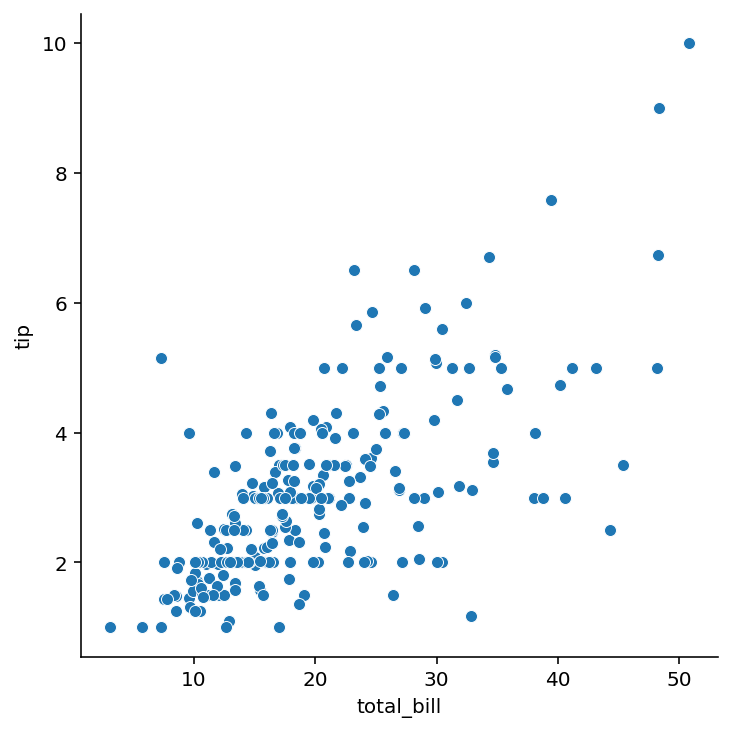

In [5]:
sns.relplot(data=tips,        # dataframe    
            x="total_bill",   # x-values column
            y="tip"           # y-values column
           )
plt.show()

By default, seaborn uses the original matplotlib settings for fonts, colors etc. The function `sns.set_theme()` can be used to modify these settings:

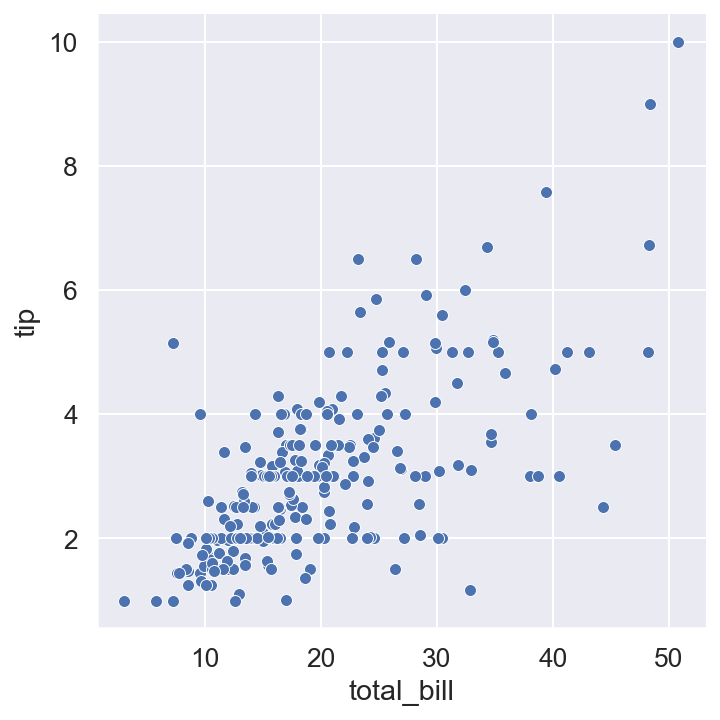

In [15]:
sns.set_theme(
              style="darkgrid",   # sets background color, grid visibility etc.
              font_scale=1.2,     # scales all fonts by the factor 1.2
             )

sns.relplot(data=tips,        
            x="total_bill",   
            y="tip"           
           )
plt.show()

We can use the values in the "day" column to assign marker colors:

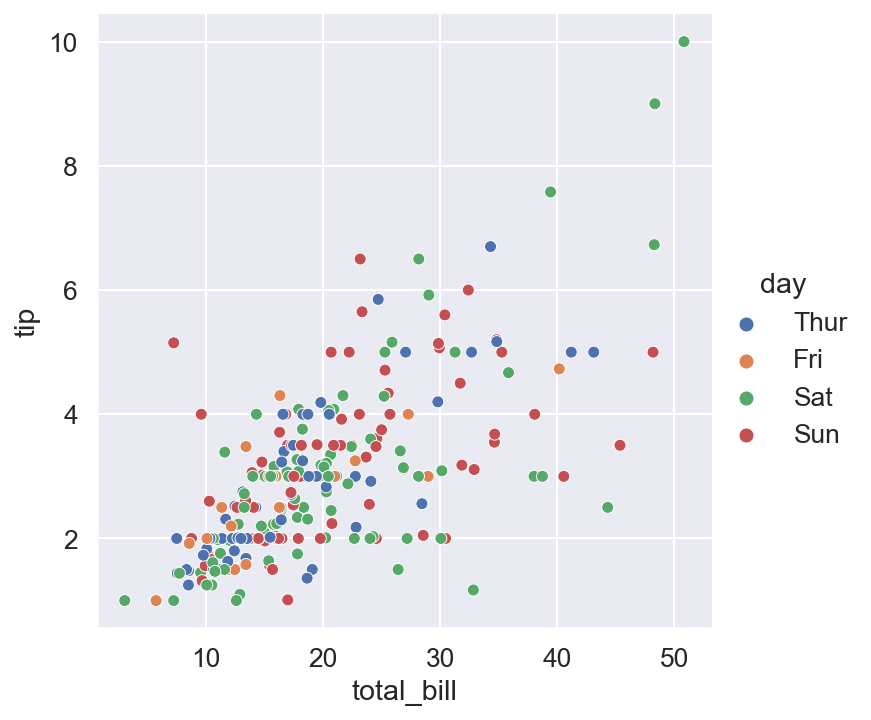

In [7]:
sns.relplot(data=tips,       
            x="total_bill",  
            y="tip",         
            hue="day"  # assign colors based on values of this column
           )
plt.show()

Next, we set different marker sizes based on values in the "size" column: 

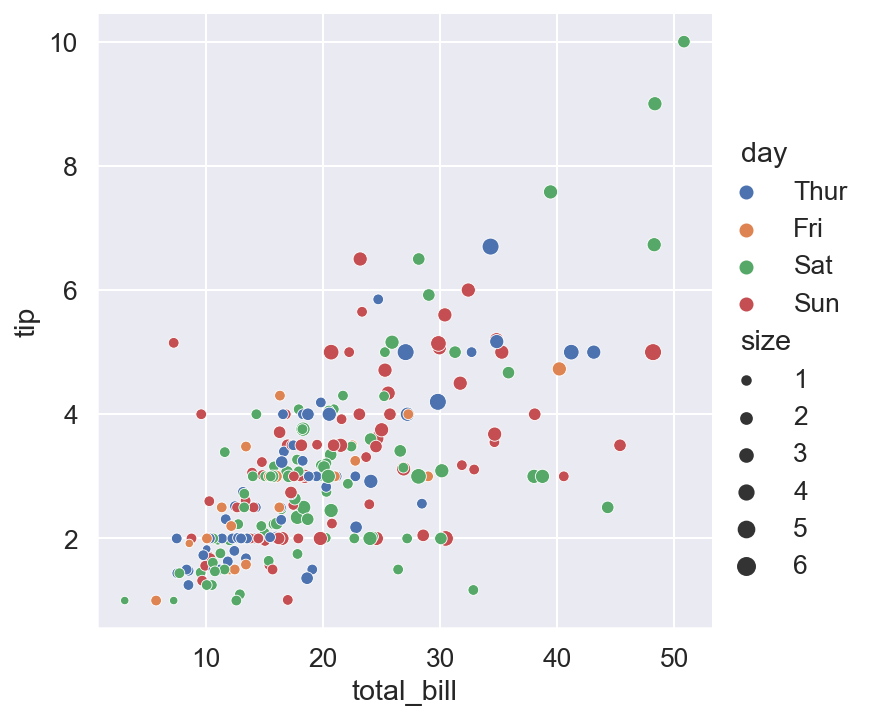

In [8]:
sns.relplot(data=tips,       
            x="total_bill",  
            y="tip",         
            hue="day", 
            size="size"  # assigns marker sizes based on values of this column
           )
plt.show()

We can also split the plot into subplots based on values of some column. Below we create two subplots, each displaying data for a different value of the "time" column: 

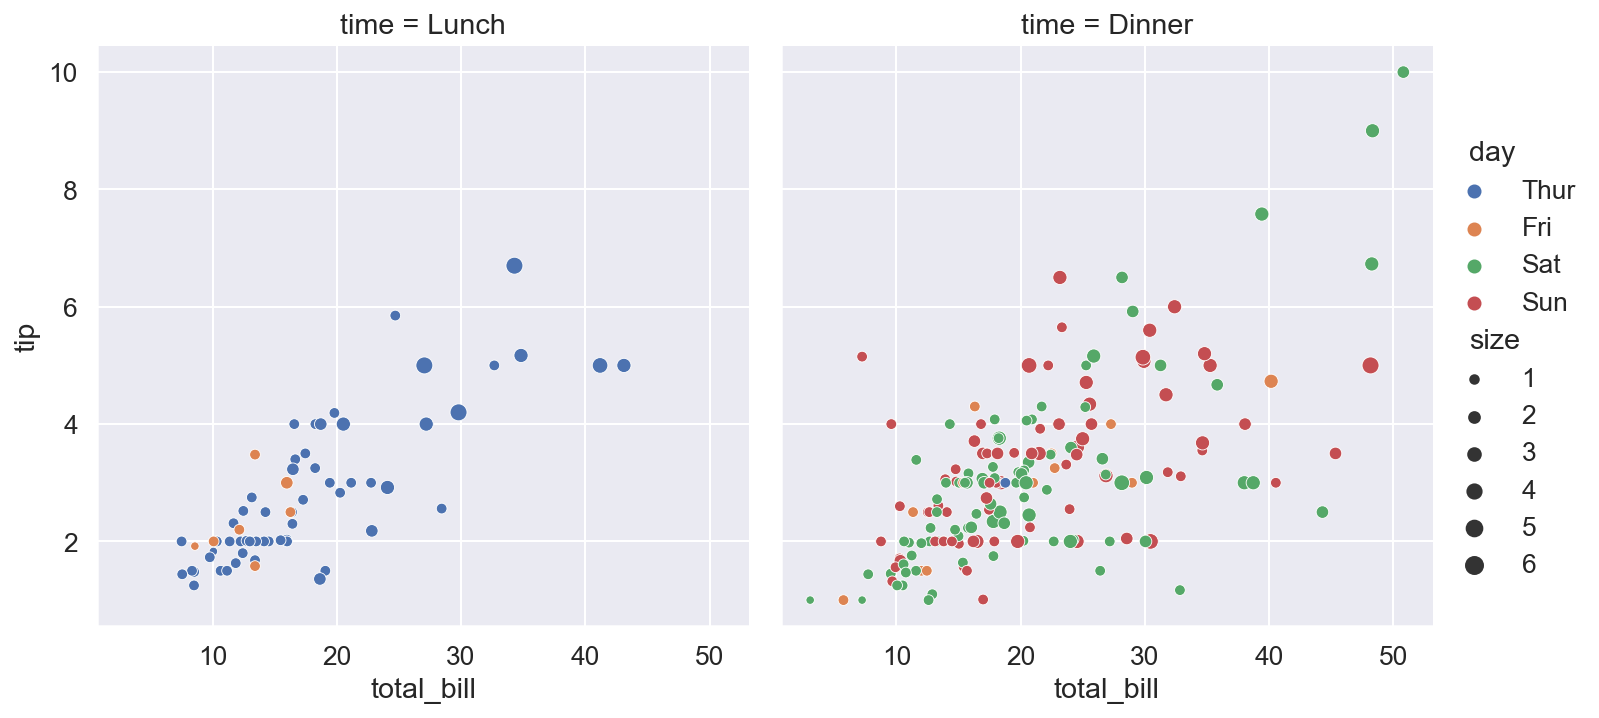

In [9]:
sns.relplot(data=tips,       
            x="total_bill",  
            y="tip",         
            hue="day", 
            size="size", 
            col="time",   # columns of subplots depending on "time" value
           )
plt.show()

We can subdivide the plot even further using values of the "sex" column:

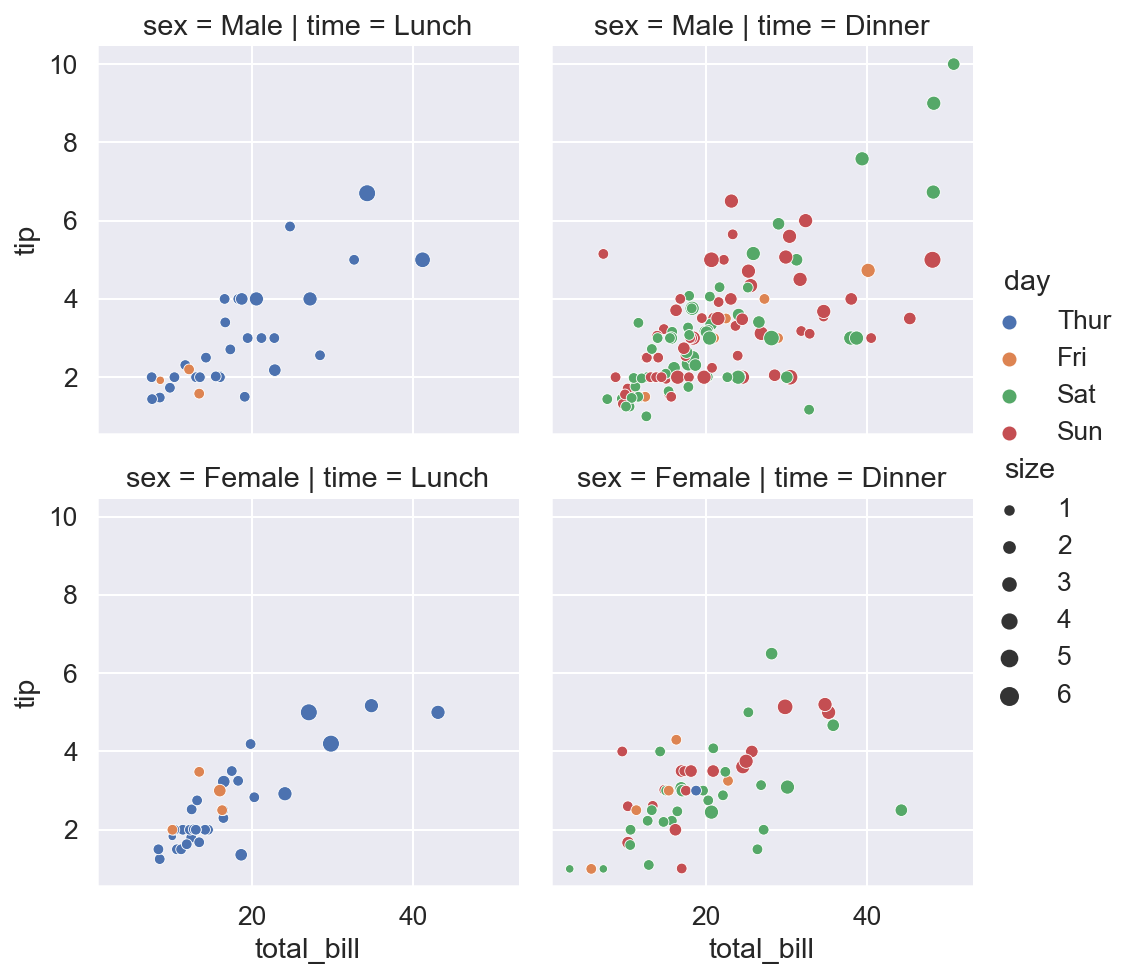

In [17]:
sns.relplot(data=tips,       
            x="total_bill",  
            y="tip",         
            hue="day", 
            size="size", 
            col="time",    # columns of subplots depending on "time" value
            row="sex",      # rows of subplots depending on "sex" value
            height=3.4
           )
plt.show()

## Figure-level and axes-level functions

Functions provided by seaborn come in two types. Figure-level functions generate the whole matplotlib figure which may consist of several subplots. The function `sns.relplot()` used in the examples above if such a figure-level function. Axes-level functions create plots in a matplotlib axes object, i.e. in a single subplot. Plots obtained using such a function can be combined with plots created using other seaborn axes-level functions or just standard matplotlib functions:    

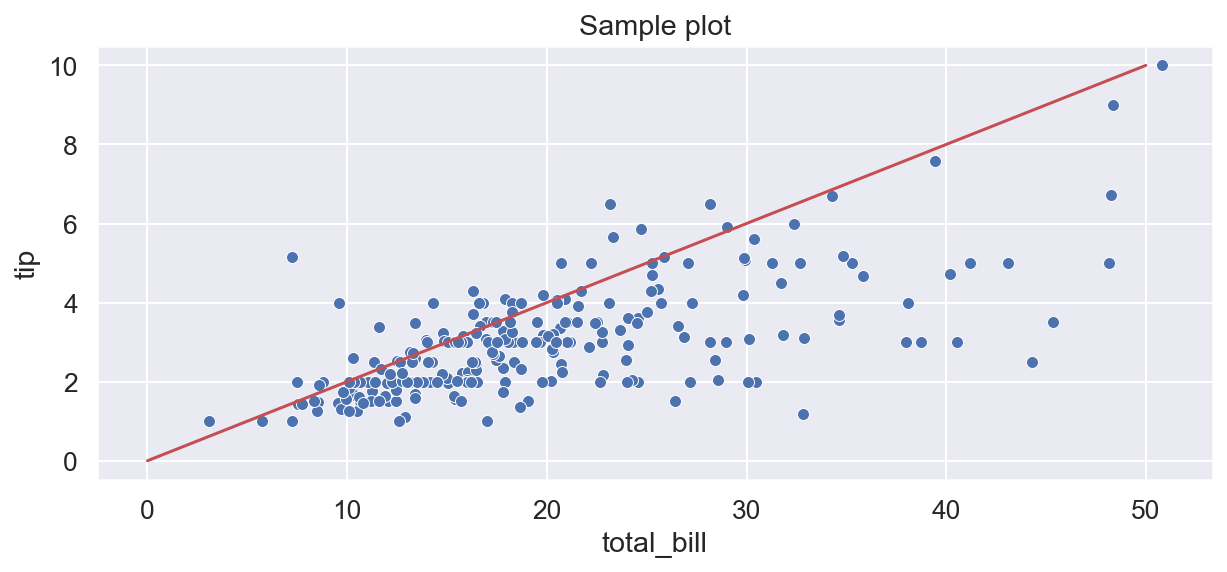

In [11]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=tips, x="total_bill", y="tip")  # seaborn plot
plt.plot([0, 50], [0, 10], 'r-')                     # add a line using matplotlib
plt.title("Sample plot")
plt.show()

Below we create a figure with three subplots. Two of them use axes level seaborn functions, and the third is regular matplotlib plot.

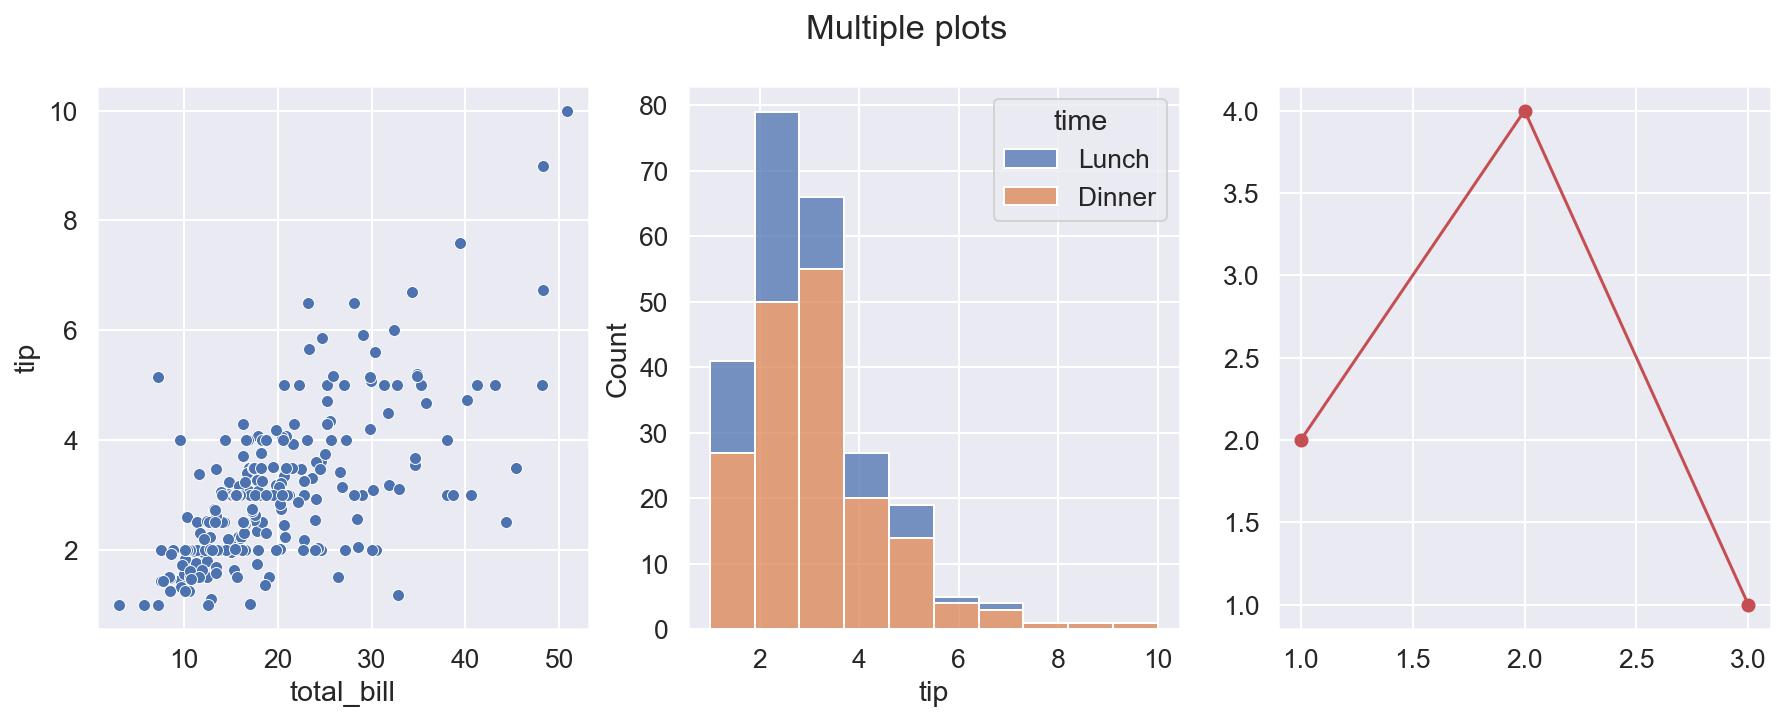

In [12]:
plt.figure(figsize=(15, 5))
plt.suptitle("Multiple plots")
plt.subplot(131)
sns.scatterplot(data=tips, x="total_bill", y="tip")  
plt.subplot(132)
sns.histplot(data=tips, x="tip", bins=10, hue="time", multiple="stack")
plt.subplot(133)
plt.plot([1, 2, 3], [2, 4, 1], 'ro-')
plt.show()

## Customizing plots

Seaborn functions have several arguments which can be used to control appearance of plots: size of plots, colors, marker sizes etc.   

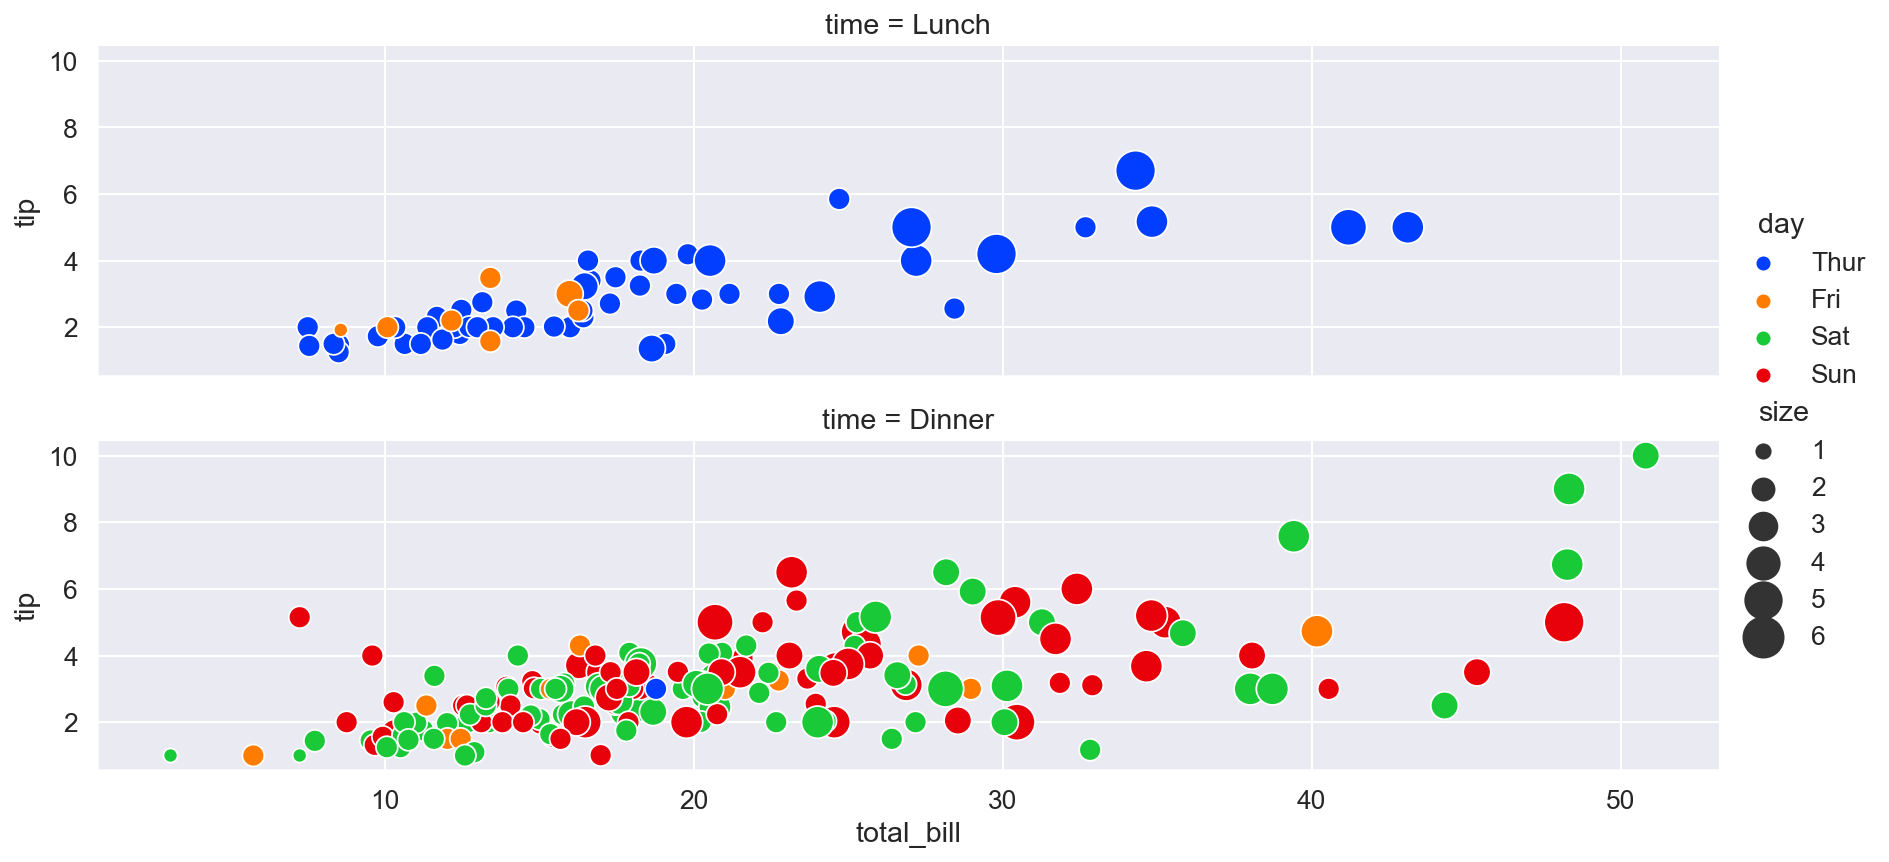

In [13]:
sns.relplot(data=tips,       
            x="total_bill",  
            y="tip",         
            hue="day", 
            size="size", 
            row="time",
            sizes=(50, 400),      # a tuple with minimal and maximal size of markers
            palette = "bright",   # color palette used to plot markers
            height= 3,            # height of each subplot
            aspect = 4            # aspect ratio: the width of each subplot will be 1.5 times its height 
           )

plt.show()

To further customize appearance of plots we can use the function `sns.set_theme()` (which we have seen once already) with the `rc` argument. The value of this argument should be a dictionary of [matplotlib rc parameters](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html#a-sample-matplotlibrc-file):   

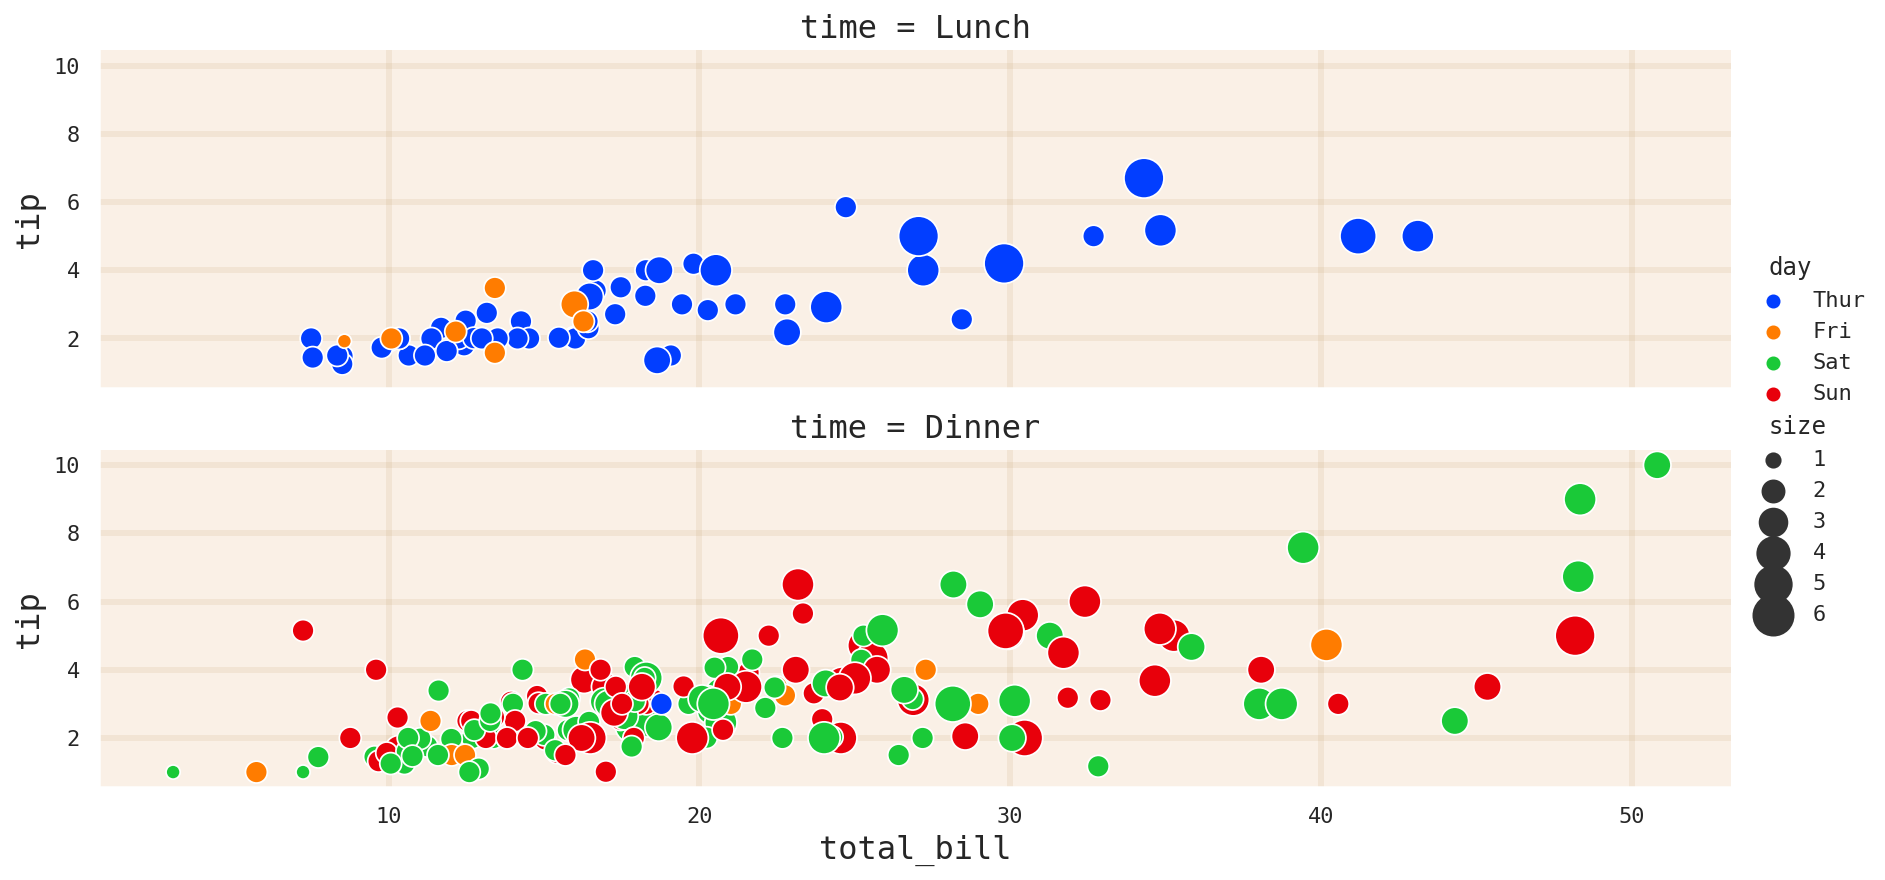

In [16]:
sns.set_theme(
    rc={
        'axes.facecolor': 'linen',
        'grid.color': 'tan',
        'grid.linewidth': 3,
        'grid.alpha': 0.2,
        'font.family': "monospace",
        'axes.labelsize': 16
    })

sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="day",
    size="size",
    row="time",
    sizes=(50, 400), 
    palette="bright",   
    height=3,           
    aspect=4            
)

plt.show()

The values of currently used rc parameters can be displayed using the `sns.axes.style()` function:

In [15]:
sns.axes_style()

{'axes.facecolor': 'linen',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'tan',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['monospace'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}